Importamos las variables requeridas

In [3]:
import pandas as pd
import math

data = {
    "link":"https://datosabiertos.impi.gob.mx/IMPICifras/Proteccion01.csv",
    "identificador":"Proteccion",
    "sector": "INNOVACIÓN",
    "subSector": "PATENTES",
    "Institucion": "IMPI",
}
df=pd.read_csv(data['link'], encoding ='utf-8', delimiter=',', header = None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Solicitudes de declaración administrativa / 20...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Administrative Declaration Applications / 2001...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Año/\nYear,Total/\nTotal,Procesos/ \nProcedures,NaN,NaN,Prevención/ \nPrevention,NaN,Derecho de Autor/ \nCopyright,NaN,Medidas Tecnológicas/\nTechnological Measures,Marcas Notorias/ \nWell Known trademarks
4,NaN,NaN,Nulidad/\nNullity,Caducidad/\nNone-Use,Cancelación/\nCancellation,Infracciones/\nInfringement,Medidas Provisionales/\nProvisional Measures,Infracciones/\nInfringement,Medidas Provisionales/\nProvisional Measures,NaN,NaN


Ahora eliminamos lo que no queremos del final del archivo

Todas las tablas que se han revisado constan con la misma estructura los datos finales no tienen información en la segunda columna, sin embargo, los datos que necesitamos siempre tienen datos entonces lo que haremos será lo siguiente

In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10
33,4T/2022,711,162,259,0,103,95,71,7,-,14
34,Anual 2022,"2,863",755,"1,059",3,421,299,183,82,-,61
35,Fuente: Dirección Divisional de Protección a l...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,N/A = No Aplica / Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Método para eliminar columnas en pandas
    axis = 1 Elimina columnas
    axis = 0 Elimina filas
    inplace = True Guarda los cambios en el dataFrame

In [6]:
longitudFilas = len(df.count(axis=1)) - 1
print(longitudFilas)

37


Creamos un ciclo while que empiece desde la cola del dataFrame

In [7]:
cicloWhile = longitudFilas
while cicloWhile > 0:
    if pd.isna(df[2][cicloWhile]) == True:
        df.drop([cicloWhile], axis=0, inplace = True)
        cicloWhile = cicloWhile - 1
    else:
        break
df.tail()

,0,1,2,3,4,5,6,7,8,9,10
30,1T/2022,671,167,291,0,83,33,65,12,-,20
31,2T/2022,675,163,223,2,106,79,28,52,-,22
32,3T/2022,806,263,286,1,129,92,19,11,-,5
33,4T/2022,711,162,259,0,103,95,71,7,-,14
34,Anual 2022,"2,863",755,"1,059",3,421,299,183,82,-,61


In [8]:
df = df.drop([0, 1, 2], axis=0).reset_index(drop = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Año/\nYear,Total/\nTotal,Procesos/ \nProcedures,NaN,NaN,Prevención/ \nPrevention,NaN,Derecho de Autor/ \nCopyright,NaN,Medidas Tecnológicas/\nTechnological Measures,Marcas Notorias/ \nWell Known trademarks
1,NaN,NaN,Nulidad/\nNullity,Caducidad/\nNone-Use,Cancelación/\nCancellation,Infracciones/\nInfringement,Medidas Provisionales/\nProvisional Measures,Infracciones/\nInfringement,Medidas Provisionales/\nProvisional Measures,NaN,NaN
2,2001,"1,698",431,354,2,583,23,287,18,-,NaN
3,2002,"2,007",582,373,1,648,49,348,6,-,NaN
4,2003,"2,028",479,403,1,542,128,445,30,-,NaN


Ahora reestructuramos la tabla si esta tiene celdas combinadas, deberia quedar algo asi

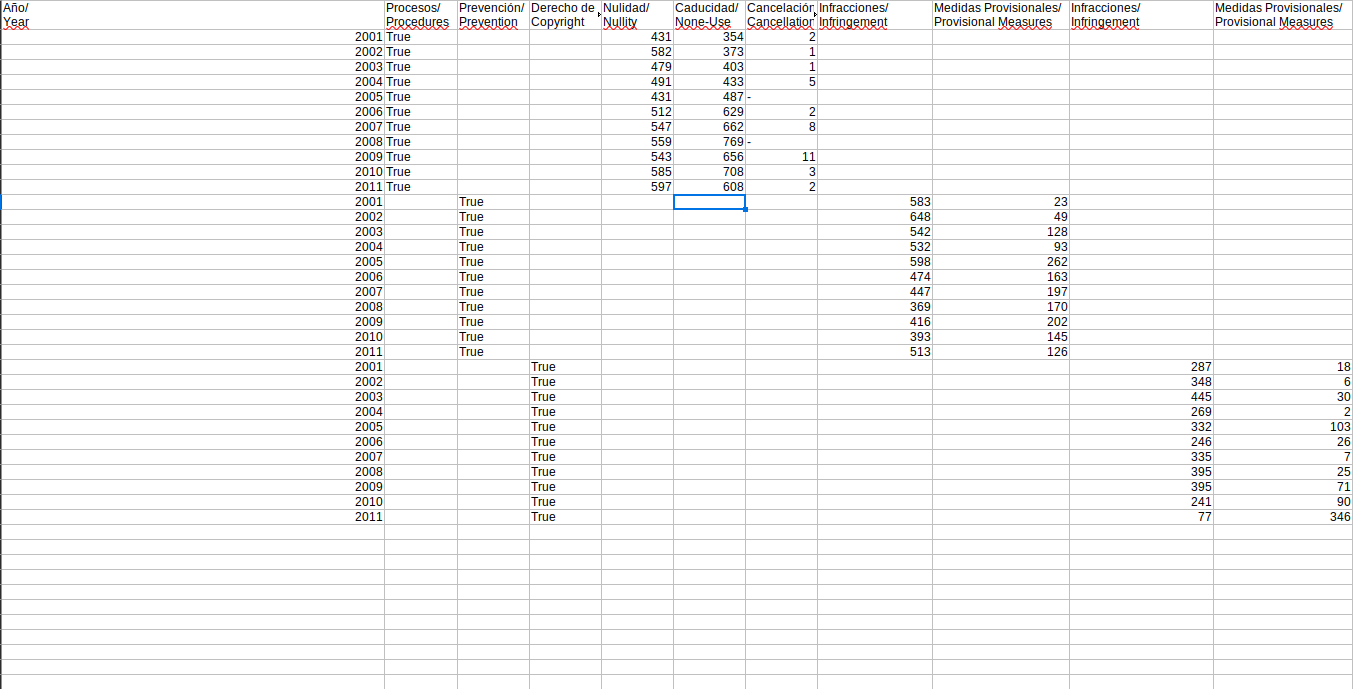

Ahora formateamos los títulos principales y subtitulos

In [9]:
import re
regExp = "[a-zA-Z]+[^\/\n]+"

x = 0
longitud = len(df.columns)
while x < longitud:
    if pd.isna(df[x][0]) != True:
        df[x][0] = re.findall(regExp, df[x][0])[0]
    x = x + 1

x = 0
longitud = len(df.columns)
while x < longitud:
    if pd.isna(df[x][1]) != True:
        df[x][1] = re.findall(regExp, df[x][1])[0]
    x = x + 1
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Año,Total,Procesos,NaN,NaN,Prevención,NaN,Derecho de Autor,NaN,Medidas Tecnológicas,Marcas Notorias
1,NaN,NaN,Nulidad,Caducidad,Cancelación,Infracciones,Medidas Provisionales,Infracciones,Medidas Provisionales,NaN,NaN
2,2001,"1,698",431,354,2,583,23,287,18,-,NaN
3,2002,"2,007",582,373,1,648,49,348,6,-,NaN
4,2003,"2,028",479,403,1,542,128,445,30,-,NaN


In [10]:
x = 0
longitud = len(df.columns)
while x < longitud:
    if pd.isna(df[x][0]) == True:
        df[x][0] = df[x - 1][0]
    x = x + 1
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Año,Total,Procesos,Procesos,Procesos,Prevención,Prevención,Derecho de Autor,Derecho de Autor,Medidas Tecnológicas,Marcas Notorias
1,NaN,NaN,Nulidad,Caducidad,Cancelación,Infracciones,Medidas Provisionales,Infracciones,Medidas Provisionales,NaN,NaN
2,2001,"1,698",431,354,2,583,23,287,18,-,NaN
3,2002,"2,007",582,373,1,648,49,348,6,-,NaN
4,2003,"2,028",479,403,1,542,128,445,30,-,NaN


Con estos datos trabajaremos en total, entonces ahora si viene lo dificil ue :'v

Tenemos 5 diccionarios, que contienen año, titulo principal, subtitulo y datos un ejemplo sería
    
    {
            Año: '2001',
            TituloPrincipal: "Procesos"
            Subtitulo: "Nulidad"
            Datos: 431
    }
    
Ahora lo que viene es distribuir esos datos, para eso ocupamos el arreglo llamado posiciónTítulo y el df principal

In [28]:
def asignarDatosDiccionario(df, posicion, adicionalData):
    diccionario = []
    dfCopy = df.drop([0, 1], axis=0).reset_index(drop = True)
    print("DFCopy", dfCopy)
    data = dfCopy.loc[:, [0, posicion]]
    titulo = df[posicion][0]
    subTitulo = df[posicion][1]
    if pd.isna(subTitulo) != True:
        for position in range(len(data)):
            data2 = data.loc[position]
            print("DATA 2 :", data2)
            diccionario.append({
                ,
            })
    else:
        for position in range(len(data)):
            data2 = data.loc[position]
            diccionario.append({
                "Año": data2[0],
                "Titulo Principal": titulo,
                "Subtitulo": "",
                "Datos": data2[posicion] 
            })
    return diccionario

In [29]:
dicts = []
for posicion in range(2, longitud):
    dicts.append(asignarDatosDiccionario(df, posicion, data))

print(dicts)

DFCopy             0      1      2      3   4    5    6    7    8  9    10
0         2001  1,698    431    354   2  583   23  287   18  -  NaN
1         2002  2,007    582    373   1  648   49  348    6  -  NaN
2         2003  2,028    479    403   1  542  128  445   30  -  NaN
3         2004  1,825    491    433   5  532   93  269    2  -  NaN
4         2005  2,213    431    487   -  598  262  332  103  -  NaN
5         2006  2,052    512    629   2  474  163  246   26  -  NaN
6         2007  2,207    547    662   8  447  197  335    7  -    4
7         2008  2,290    559    769   -  369  170  395   25  -    3
8         2009  2,309    543    656  11  416  202  395   71  -   15
9         2010  2,173    585    708   3  393  145  241   90  -    8
10        2011  2,281    597    608   2  513  126   77  346  -   12
11        2012  2,502    700    766   4  444  103   94  386  -    5
12        2013  2,658    741    753   6  426  177   88  453  -   14
13        2014  2,603    730    732   7  

In [20]:
df7 = pd.DataFrame(dicts[0])
print(df7)

           Año Titulo Principal Subtitulo  Datos      sector subSector  \
0         2001         Procesos   Nulidad    431  INNOVACIÓN  PATENTES   
1         2002         Procesos   Nulidad    582  INNOVACIÓN  PATENTES   
2         2003         Procesos   Nulidad    479  INNOVACIÓN  PATENTES   
3         2004         Procesos   Nulidad    491  INNOVACIÓN  PATENTES   
4         2005         Procesos   Nulidad    431  INNOVACIÓN  PATENTES   
5         2006         Procesos   Nulidad    512  INNOVACIÓN  PATENTES   
6         2007         Procesos   Nulidad    547  INNOVACIÓN  PATENTES   
7         2008         Procesos   Nulidad    559  INNOVACIÓN  PATENTES   
8         2009         Procesos   Nulidad    543  INNOVACIÓN  PATENTES   
9         2010         Procesos   Nulidad    585  INNOVACIÓN  PATENTES   
10        2011         Procesos   Nulidad    597  INNOVACIÓN  PATENTES   
11        2012         Procesos   Nulidad    700  INNOVACIÓN  PATENTES   
12        2013         Procesos   Nuli

In [24]:
df7.head()

,Año,Titulo Principal,Subtitulo,Datos,sector,subSector,Institucion
0,2001,Procesos,Nulidad,431,INNOVACIÓN,PATENTES,IMPI
1,2002,Procesos,Nulidad,582,INNOVACIÓN,PATENTES,IMPI
2,2003,Procesos,Nulidad,479,INNOVACIÓN,PATENTES,IMPI
3,2004,Procesos,Nulidad,491,INNOVACIÓN,PATENTES,IMPI
4,2005,Procesos,Nulidad,431,INNOVACIÓN,PATENTES,IMPI


In [25]:
dfPrueba = df7.pivot(index=["Titulo Principal", "sector", "subSector", "Institucion","Año" ], columns="Subtitulo", values="Datos")
dfPrueba.head()

Subtitulo                                                 Nulidad
Titulo Principal sector     subSector Institucion Año            
Procesos         INNOVACIÓN PATENTES  IMPI        1T/2021     211
                                                  1T/2022     167
                                                  2001        431
                                                  2002        582
                                                  2003        479

In [22]:
dfPrueba.sort_index()

Subtitulo                   Nulidad
Titulo Principal Año               
Procesos         1T/2021        211
                 1T/2022        167
                 2001           431
                 2002           582
                 2003           479
                 2004           491
                 2005           431
                 2006           512
                 2007           547
                 2008           559
                 2009           543
                 2010           585
                 2011           597
                 2012           700
                 2013           741
                 2014           730
                 2015           985
                 2016         1,089
                 2017         1,032
                 2018           990
                 2019           798
                 2020           674
                 2T/2021        196
                 2T/2022        163
                 3T/2021        172
                 3T/2022        263
                 4T/2021        209
                 4T/2022        162
                 Anual 2021     788
                 Anual 2022     755

In [23]:
dfPruebaFinal = dfConcat.pivot(index=["Titulo Principal" ,"Año"], columns="Subtitulo", values="Datos")
dfPruebaFinal.sort_index()

NameError: name 'dfConcat' is not defined

In [17]:
df1 = dfPruebaFinal.where(pd.notnull(dfPruebaFinal), 0)
df1.sort_index()

Subtitulo                    Caducidad  Nulidad
Titulo Principal Año                           
Procesos         1T/2021           326      211
                 1T/2022           291      167
                 2001              354      431
                 2002              373      582
                 2003              403      479
                 2004              433      491
                 2005              487      431
                 2006              629      512
                 2007              662      547
                 2008              769      559
                 2009              656      543
                 2010              708      585
                 2011              608      597
                 2012              766      700
                 2013              753      741
                 2014              732      730
                 2015              971      985
                 2016              927     1089
                 2017             1043     1032
                 2018             1147      990
                 2019             1156      798
                 2020              883      674
                 2T/2021           297      196
                 2T/2022           223      163
                 3T/2021           277      172
                 3T/2022           286      263
                 4T/2021           275      209
                 4T/2022           259      162
                 Anual 2021       1175      788
                 Anual 2022       1059      755

In [ ]:

df1['Total'] = df1.apply(lambda x:x['Caducidad']+x['Cancelación']+x['Infracciones']+x['Medidas Provisionales']+x['Nulidad'],axis=1)
df1.sort_index()